In [1]:
import os
import time
import h5py
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [4]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.0454709529876709


In [5]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

62.37659025192261


In [6]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

70.47099733352661


In [7]:
del lw2,lS2

In [8]:
start = time.time()

w2 = 0.5*w2

end = time.time()
print(end-start)

29.913795471191406


In [9]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

249.218 249.219 7.34719e-07


In [10]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

52.81799578666687


In [11]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [12]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

327.3781213760376


In [13]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [14]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 364.8652229309082
time : 324.49936509132385
time : 322.58331394195557
time : 323.13266682624817
time : 316.2894847393036
time : 313.113228559494


In [15]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[S2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 308.6856014728546
time : 312.758327960968
time : 296.1363823413849
time : 300.02505922317505
time : 309.83105635643005
time : 311.9003713130951


t = 1*sigma_2: Linear fit [alpha A] = [-0.1037311  -0.80187054]
t = 2*sigma_2: Linear fit [alpha A] = [-0.18202561 -1.0192294 ]
t = 3*sigma_2: Linear fit [alpha A] = [-0.24496054 -1.13519577]
t = 4*sigma_2: Linear fit [alpha A] = [-0.29875631 -1.20635975]
t = 5*sigma_2: Linear fit [alpha A] = [-0.34622119 -1.2527781 ]
t = 6*sigma_2: Linear fit [alpha A] = [-0.38919419 -1.28306311]


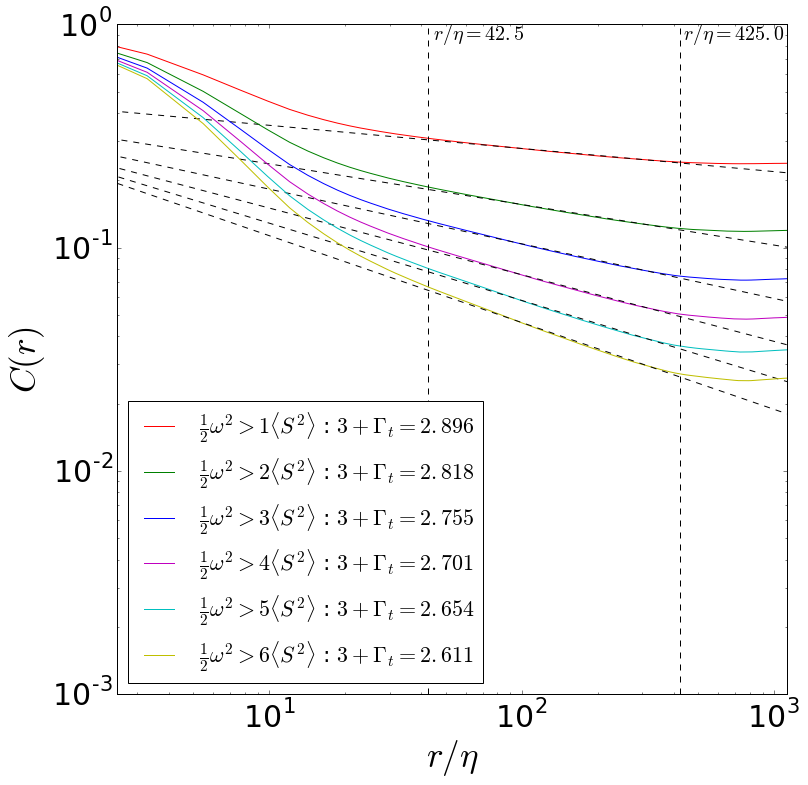

In [16]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**0])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.85, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.85, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy-pure-0.pdf')

t = 1*sigma_2: Linear fit [alpha A] = [-0.14190173 -0.39593325]
t = 2*sigma_2: Linear fit [alpha A] = [-0.27253386 -0.44104948]
t = 3*sigma_2: Linear fit [alpha A] = [-0.38051184 -0.41303416]
t = 4*sigma_2: Linear fit [alpha A] = [-0.47323264 -0.36091899]
t = 5*sigma_2: Linear fit [alpha A] = [-0.55481593 -0.30024413]
t = 6*sigma_2: Linear fit [alpha A] = [-0.62780744 -0.2378036 ]


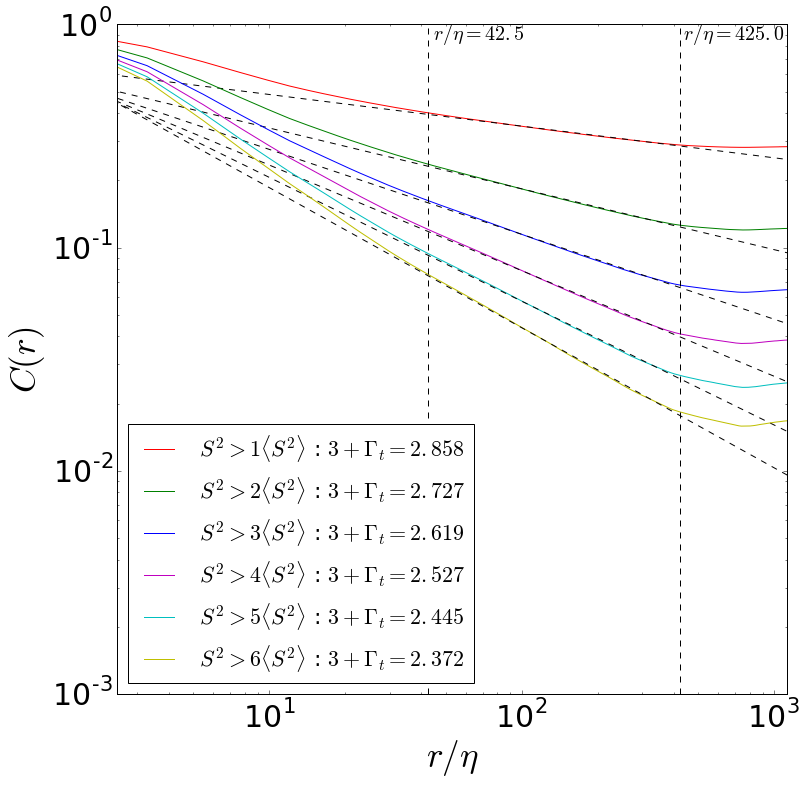

In [17]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**0])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'-',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.85, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.85, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-strainrate-pure-0.pdf')

t = 1*sigma_2: Linear fit [alpha A] = [-0.1037311  -0.80187054]
t = 2*sigma_2: Linear fit [alpha A] = [-0.18202561 -1.0192294 ]
t = 3*sigma_2: Linear fit [alpha A] = [-0.24496054 -1.13519577]
t = 1*sigma_2: Linear fit [alpha A] = [-0.14190173 -0.39593325]
t = 2*sigma_2: Linear fit [alpha A] = [-0.27253386 -0.44104948]
t = 3*sigma_2: Linear fit [alpha A] = [-0.38051184 -0.41303416]


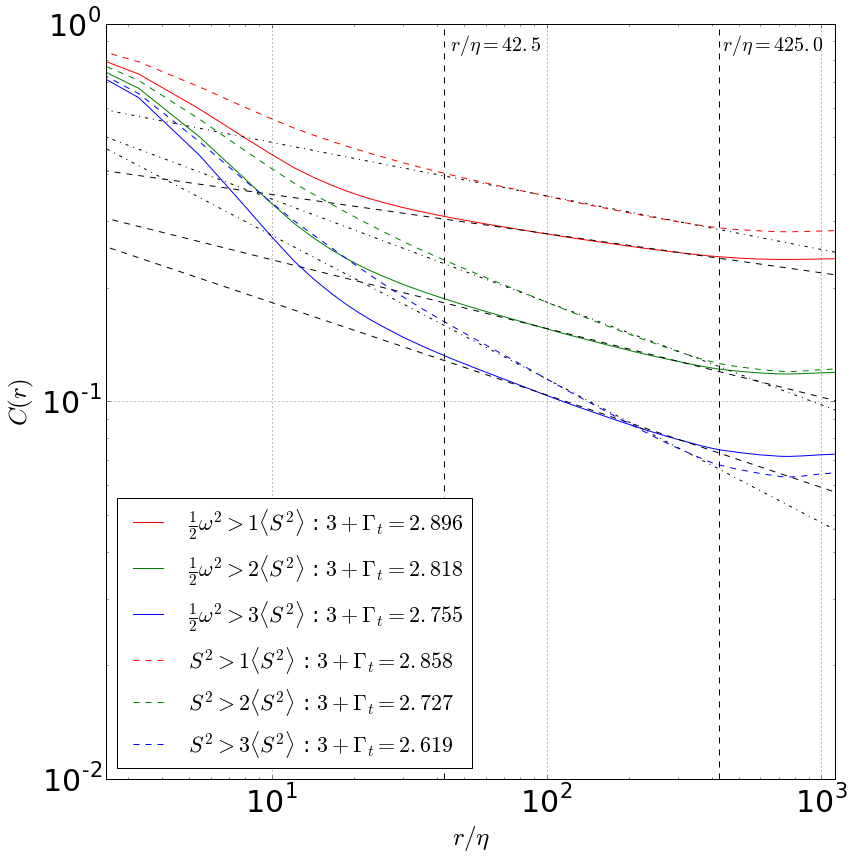

In [26]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-2),10**0])
    
for i in range(3):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':22})
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.85, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.85, r'$r/\eta = 425.0$', fontsize=20)
plt.tight_layout()
plt.savefig('twopoint-enstrophy-dissipation-0.pdf')

t = 4*sigma_2: Linear fit [alpha A] = [-0.29875631 -1.20635975]
t = 5*sigma_2: Linear fit [alpha A] = [-0.34622119 -1.2527781 ]
t = 6*sigma_2: Linear fit [alpha A] = [-0.38919419 -1.28306311]
t = 4*sigma_2: Linear fit [alpha A] = [-0.47323264 -0.36091899]
t = 5*sigma_2: Linear fit [alpha A] = [-0.55481593 -0.30024413]
t = 6*sigma_2: Linear fit [alpha A] = [-0.62780744 -0.2378036 ]


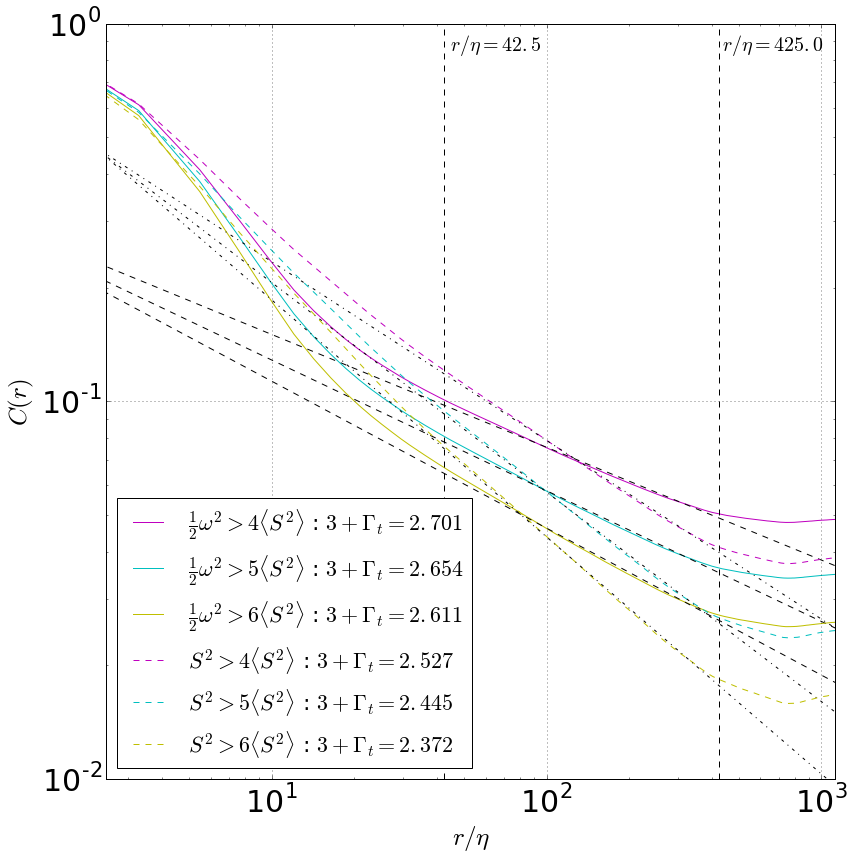

In [48]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-2),10**0])
    
for i in range(3,6,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3,6,1):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':22})
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.85, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.85, r'$r/\eta = 425.0$', fontsize=20)
plt.tight_layout()
plt.savefig('twopoint-enstrophy-dissipation-1.pdf')

In [18]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 317.9015336036682
time : 339.18356132507324
time : 310.0235080718994
time : 329.9504745006561
time : 374.61421298980713
time : 353.35491919517517


In [19]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[S2 > t*avg] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 341.5118727684021
time : 370.26607489585876
time : 274.1247239112854
time : 299.6903386116028
time : 286.6993975639343
time : 283.5639741420746


t = 7*sigma_2: Linear fit [alpha A] = [-0.42833865 -1.30398591]
t = 10*sigma_2: Linear fit [alpha A] = [-0.52904365 -1.33604367]
t = 15*sigma_2: Linear fit [alpha A] = [-0.66149605 -1.34197488]
t = 20*sigma_2: Linear fit [alpha A] = [-0.76617059 -1.33290959]
t = 30*sigma_2: Linear fit [alpha A] = [-0.9318838  -1.29487985]
t = 50*sigma_2: Linear fit [alpha A] = [-1.17284893 -1.20599693]


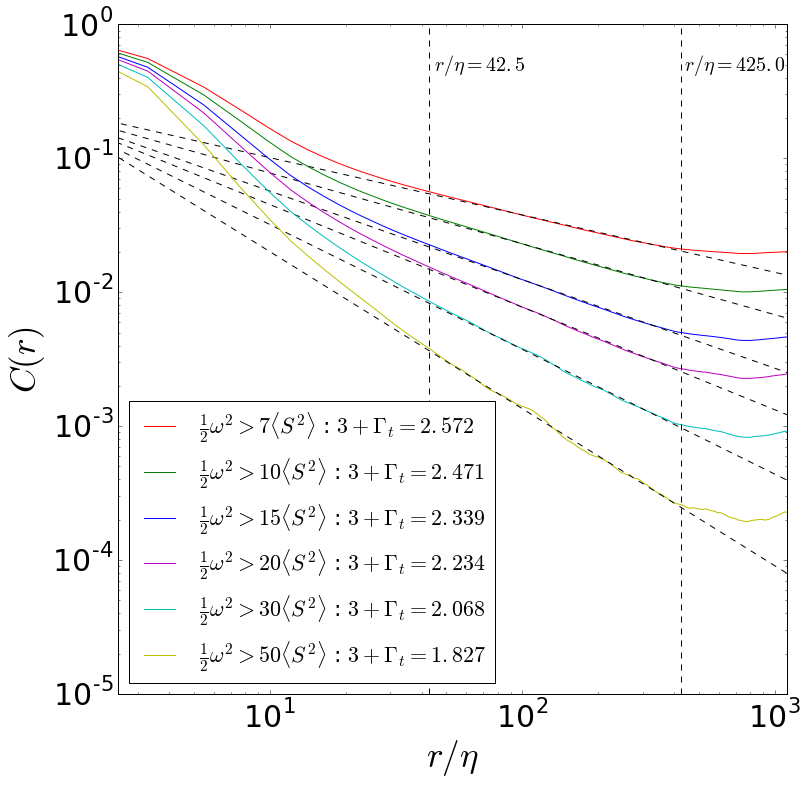

In [20]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-5),10**0])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.45, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.45, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy-pure-1.pdf')

t = 7*sigma_2: Linear fit [alpha A] = [-0.69429671 -0.17518828]
t = 10*sigma_2: Linear fit [alpha A] = [-0.86684914  0.0101391 ]
t = 15*sigma_2: Linear fit [alpha A] = [-1.09942954  0.29441468]
t = 20*sigma_2: Linear fit [alpha A] = [-1.29125325  0.54352279]
t = 30*sigma_2: Linear fit [alpha A] = [-1.62146798  1.03183245]
t = 50*sigma_2: Linear fit [alpha A] = [-2.32103928  2.73383266]


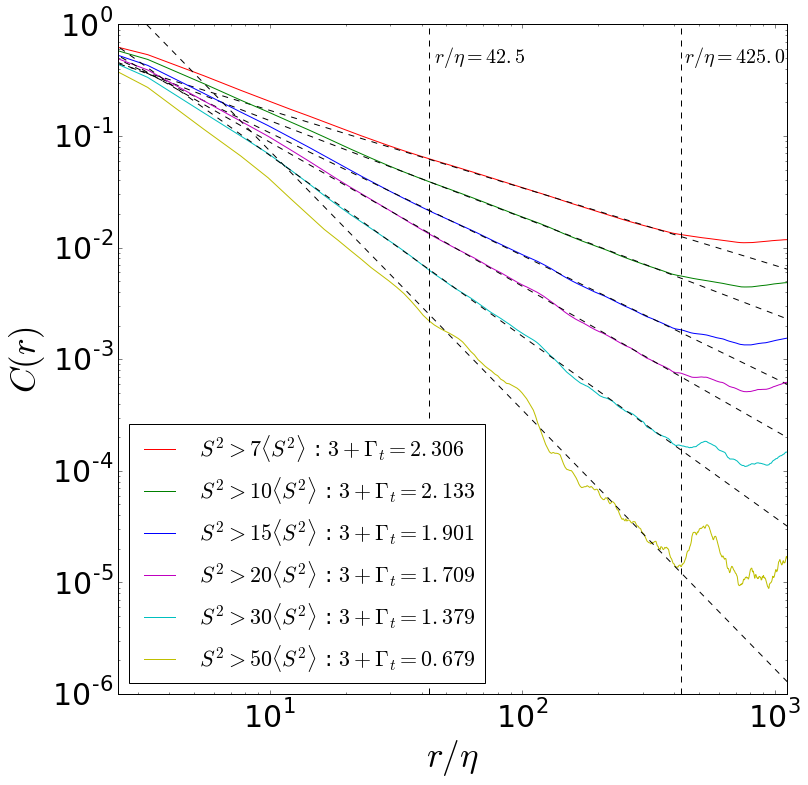

In [21]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**0])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'-',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.45, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.45, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-strainrate-pure-1.pdf')

t = 7*sigma_2: Linear fit [alpha A] = [-0.73792286 -0.76435331]
t = 10*sigma_2: Linear fit [alpha A] = [-0.9051417  -0.63487836]
t = 15*sigma_2: Linear fit [alpha A] = [-1.13314647 -0.4079769 ]
t = 7*sigma_2: Linear fit [alpha A] = [-0.69429671 -0.17518828]
t = 10*sigma_2: Linear fit [alpha A] = [-0.86684914  0.0101391 ]
t = 15*sigma_2: Linear fit [alpha A] = [-1.09942954  0.29441468]


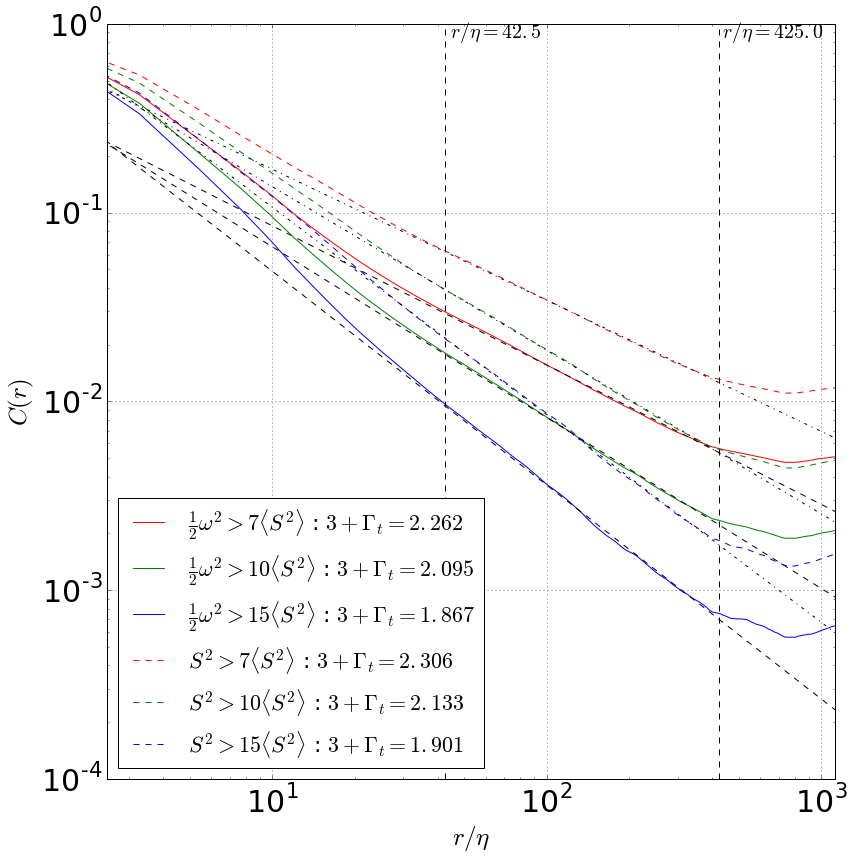

In [71]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**0])
    
for i in range(3):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':22})
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.85, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.85, r'$r/\eta = 425.0$', fontsize=20)
plt.tight_layout()
plt.savefig('twopoint-enstrophy-dissipation-2.pdf')

t = 20*sigma_2: Linear fit [alpha A] = [-1.32020502 -0.20810164]
t = 30*sigma_2: Linear fit [alpha A] = [-1.66108213  0.29276804]
t = 50*sigma_2: Linear fit [alpha A] = [-2.56448348  2.96843845]
t = 20*sigma_2: Linear fit [alpha A] = [-1.29125325  0.54352279]
t = 30*sigma_2: Linear fit [alpha A] = [-1.62146798  1.03183245]
t = 50*sigma_2: Linear fit [alpha A] = [-2.32103928  2.73383266]


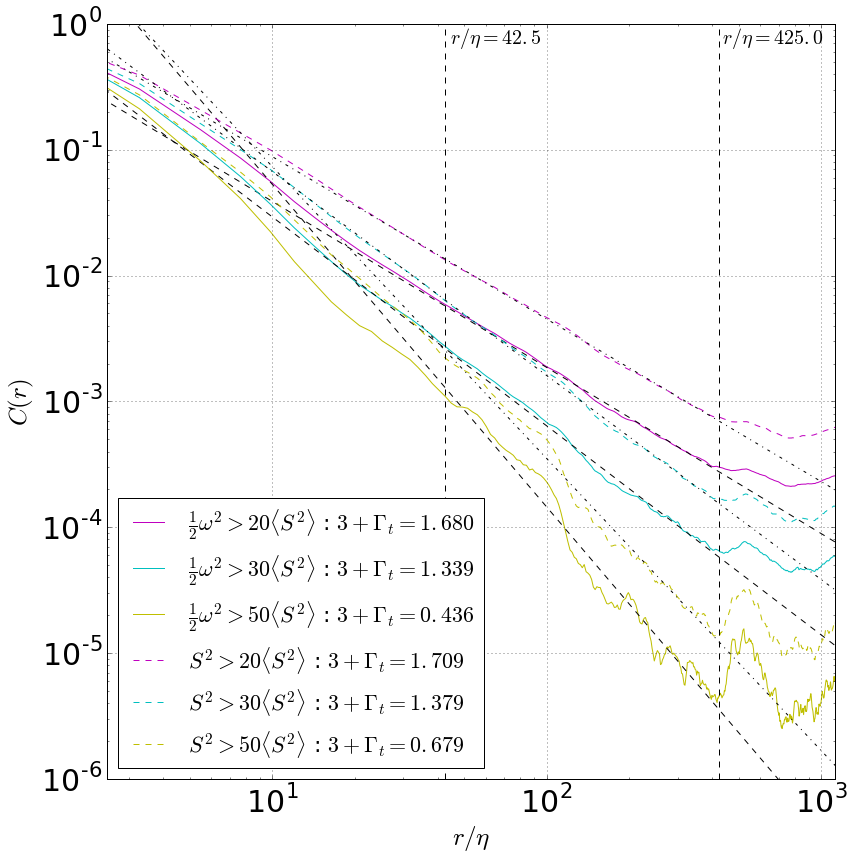

In [72]:
eta = 0.00280

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**0])
    
for i in range(3,6,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
        
for i in range(3,6,1):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k-.')
    
plt.legend(loc='lower left',prop={'size':22})
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.7, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.7, r'$r/\eta = 425.0$', fontsize=20)
plt.tight_layout()
plt.savefig('twopoint-enstrophy-dissipation-3.pdf')

In [32]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(S2 > t*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 383.64773988723755
time : 418.69495129585266
time : 326.06434655189514
time : 316.81371998786926
time : 311.1530246734619
time : 295.526948928833


t = 1*sigma_2: Linear fit [alpha A] = [-0.18941494 -0.75348794]
t = 2*sigma_2: Linear fit [alpha A] = [-0.32522653 -0.86618457]
t = 3*sigma_2: Linear fit [alpha A] = [-0.43276663 -0.88515914]
t = 4*sigma_2: Linear fit [alpha A] = [-0.52365485 -0.86933608]
t = 5*sigma_2: Linear fit [alpha A] = [-0.60299628 -0.83903311]
t = 6*sigma_2: Linear fit [alpha A] = [-0.67371551 -0.80282244]


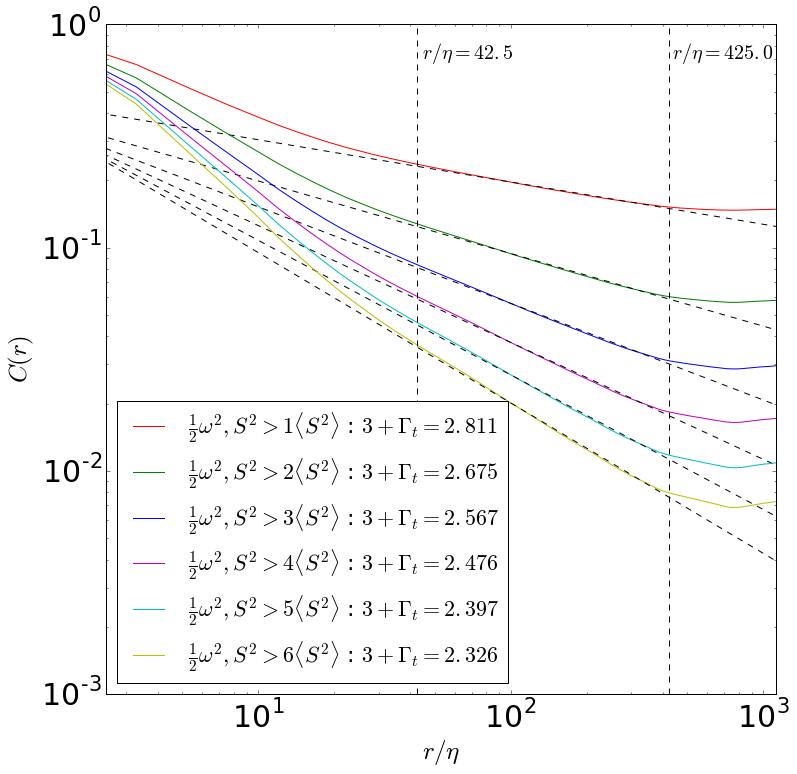

In [33]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**0])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2,S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.7, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.7, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy+dissipation-0.pdf')

In [34]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(S2 > t*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 303.3821339607239
time : 299.86286211013794
time : 317.2915599346161
time : 338.3180079460144
time : 362.5074849128723
time : 350.8881812095642


t = 7*sigma_2: Linear fit [alpha A] = [-0.73792286 -0.76435331]
t = 10*sigma_2: Linear fit [alpha A] = [-0.9051417  -0.63487836]
t = 15*sigma_2: Linear fit [alpha A] = [-1.13314647 -0.4079769 ]
t = 20*sigma_2: Linear fit [alpha A] = [-1.32020502 -0.20810164]
t = 30*sigma_2: Linear fit [alpha A] = [-1.66108213  0.29276804]
t = 50*sigma_2: Linear fit [alpha A] = [-2.56448348  2.96843845]


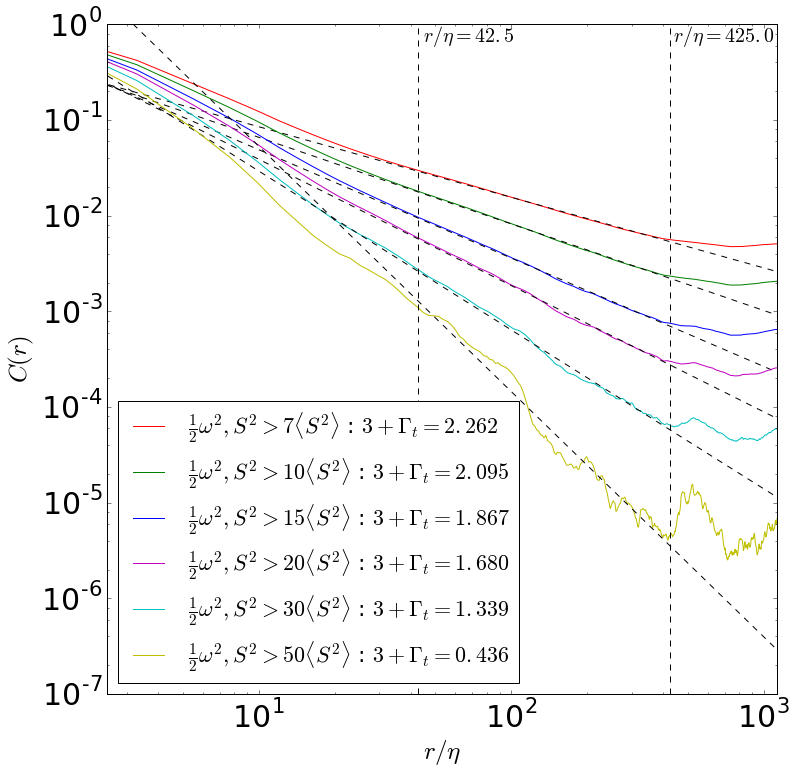

In [35]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.ylabel(r'$C(r)$', fontsize=25)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**0])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$ \frac{1}{2}\omega^2,S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3+\Gamma_t = {0:.3f}$'.format(3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.65, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.65, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy+dissipation-1.pdf')

In [14]:
E_bins = 200
w2min = np.min(w2)/avgO
w2max = np.max(w2)/avgO

In [15]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 

In [31]:
print(w2min,w2max)
print(len(tl))
stl = range(E_bins-1)
print(stl[198])

1.4302e-07 675.168
200
198


In [33]:
start = time.time()

# numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)

lcorr = []
llogr = []

for i in range(E_bins-1):
    start = time.time()
    
    tm = tl[i]
    tM = tl[i+1]
    print("tmin = ",tm," tmax = ",tM)
    print("tmed = ",np.sqrt(tm*tM))
    print("dt = ",(tM-tm)/tm)
    chi[:,:,:] = 0
    chi[(w2 > tm*avg)&(w2 < tM*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

tmin =  1.43020106864e-07  tmax =  1.5995957408e-07
tmed =  1.51252885522e-07
dt =  0.118441158993
time : 417.6486372947693
tmin =  1.5995957408e-07  tmax =  1.78905371426e-07
tmed =  1.69167452585e-07
dt =  0.118441158993
time : 382.2629177570343
tmin =  1.78905371426e-07  tmax =  2.00095130968e-07
tmed =  1.89203841733e-07
dt =  0.118441158993
time : 377.1097927093506
tmin =  2.00095130968e-07  tmax =  2.23794630189e-07
tmed =  2.11613364033e-07
dt =  0.118441158993
time : 369.701947927475
tmin =  2.23794630189e-07  tmax =  2.50301125565e-07
tmed =  2.36677096128e-07
dt =  0.118441158993
time : 368.71911883354187
tmin =  2.50301125565e-07  tmax =  2.79947080974e-07
tmed =  2.647094057e-07
dt =  0.118441158993
time : 348.96907925605774
tmin =  2.79947080974e-07  tmax =  3.13104337701e-07
tmed =  2.96061894508e-07
dt =  0.118441158993
time : 335.28595495224
tmin =  3.13104337701e-07  tmax =  3.50188778344e-07
tmed =  3.31127808427e-07
dt =  0.118441158993
time : 345.1293714046478
tmin 

In [107]:
eta = 0.00280

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

fiits = []    
for i in range(E_bins-1):
    tm = tl[i]
    tM = tl[i+1]
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    idx = tempCorrF>0
    
    if(len(tempCorrF[idx])>0):
        fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
    else:
        fit = np.array([0,0])
    
    fiits.append(fit[0])
    print("t = "+str(np.sqrt(tm*tM))+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
fiits = np.array(fitts)
#print(fiits)

t = 1.51252885522e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 1.69167452585e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 1.89203841733e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.11613364033e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.36677096128e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.647094057e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.96061894508e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 3.31127808427e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 3.70346969832e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 4.14211294168e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 4.63270959918e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 5.18141309338e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 5.79510566538e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 6.48148469687e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 7.24915925637e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 8.10775808042e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 9.06805034429e-07*sigma_2: Linear fit 

/home/idies/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


NameError: name 'fitts' is not defined

In [65]:
print(len(fiits))

199


In [112]:
start = time.time()

# numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)

tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 
scorr = []
slogr = []

for i in range(E_bins-1):
    start = time.time()
    
    tm = tl[i]
    tM = tl[i+1]
    print("tmin = ",tm," tmax = ",tM)
    print("tmed = ",np.sqrt(tm*tM))
    print("dt = ",(tM-tm)/tm)
    chi[:,:,:] = 0
    chi[(S2 > tm*avg)&(S2 < tM*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    scorr.append(corrLoc)
    slogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

tmin =  1.43020106864e-07  tmax =  1.5995957408e-07
tmed =  1.51252885522e-07
dt =  0.118441158993
time : 455.00714635849
tmin =  1.5995957408e-07  tmax =  1.78905371426e-07
tmed =  1.69167452585e-07
dt =  0.118441158993
time : 332.3129382133484
tmin =  1.78905371426e-07  tmax =  2.00095130968e-07
tmed =  1.89203841733e-07
dt =  0.118441158993
time : 329.12274742126465
tmin =  2.00095130968e-07  tmax =  2.23794630189e-07
tmed =  2.11613364033e-07
dt =  0.118441158993
time : 330.084272146225
tmin =  2.23794630189e-07  tmax =  2.50301125565e-07
tmed =  2.36677096128e-07
dt =  0.118441158993
time : 329.9377374649048
tmin =  2.50301125565e-07  tmax =  2.79947080974e-07
tmed =  2.647094057e-07
dt =  0.118441158993
time : 329.4652090072632
tmin =  2.79947080974e-07  tmax =  3.13104337701e-07
tmed =  2.96061894508e-07
dt =  0.118441158993
time : 334.94700503349304
tmin =  3.13104337701e-07  tmax =  3.50188778344e-07
tmed =  3.31127808427e-07
dt =  0.118441158993
time : 341.0312044620514
tmin 

In [113]:
print(np.array(scorr).shape)

(199, 886)


In [114]:
eta = 0.00280

tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 
rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

sfiits = []    
for i in range(E_bins-1):
    tm = tl[i]
    tM = tl[i+1]
    corrF = scorr[i]/slogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    idx = tempCorrF>0
    
    if(len(tempCorrF[idx])>0):
        fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
    else:
        fit = np.array([0,0])
    
    sfiits.append(fit[0])
    print("t = "+str(np.sqrt(tm*tM))+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
#print(sfiits)

t = 1.51252885522e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 1.69167452585e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 1.89203841733e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.11613364033e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.36677096128e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.647094057e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 2.96061894508e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 3.31127808427e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 3.70346969832e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 4.14211294168e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 4.63270959918e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 5.18141309338e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 5.79510566538e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 6.48148469687e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 7.24915925637e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 8.10775808042e-07*sigma_2: Linear fit [alpha A] = [0 0]
t = 9.06805034429e-07*sigma_2: Linear fit 

/home/idies/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


t = 0.0192346133295*sigma_2: Linear fit [alpha A] = [-0.54206645 -3.53141917]
t = 0.0215127832251*sigma_2: Linear fit [alpha A] = [-0.52065469 -3.44396409]
t = 0.0240607822034*sigma_2: Linear fit [alpha A] = [-0.49892897 -3.36151734]
t = 0.0269105691339*sigma_2: Linear fit [alpha A] = [-0.47520135 -3.29824029]
t = 0.0300978881312*sigma_2: Linear fit [alpha A] = [-0.45207641 -3.23647718]
t = 0.0336627168847*sigma_2: Linear fit [alpha A] = [-0.42727928 -3.18976714]
t = 0.0376497680874*sigma_2: Linear fit [alpha A] = [-0.40209879 -3.15052972]
t = 0.0421090502555*sigma_2: Linear fit [alpha A] = [-0.37698544 -3.11979594]
t = 0.0470964949719*sigma_2: Linear fit [alpha A] = [-0.34963256 -3.10827859]
t = 0.0526746584208*sigma_2: Linear fit [alpha A] = [-0.32439198 -3.08952139]
t = 0.0589135060138*sigma_2: Linear fit [alpha A] = [-0.29807962 -3.08519362]
t = 0.0658912899464*sigma_2: Linear fit [alpha A] = [-0.27269577 -3.08236173]
t = 0.0736955306951*sigma_2: Linear fit [alpha A] = [-0.24735145

In [115]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 
print(tl.shape)
print(np.array(fiits).shape)
print(np.array(sfiits).shape)
fiits = np.array(fiits)
sfiits = np.array(sfiits)

(199,)
(199,)
(199,)


In [117]:
sidx = sfiits != 0.

print(tl[sidx])
print(fiits[sidx])

[  9.43972340e-05   1.47710658e-04   1.65205679e-04   1.84772831e-04
   2.06657540e-04   2.31134298e-04   2.58510112e-04   2.89128350e-04
   3.23373047e-04   3.61673725e-04   4.04510780e-04   4.52421506e-04
   5.06006833e-04   5.65938869e-04   6.32969325e-04   7.07938945e-04
   7.91788054e-04   8.85568349e-04   9.90456091e-04   1.10776686e-03
   1.23897205e-03   1.38571733e-03   1.54984330e-03   1.73340854e-03
   1.93871545e-03   2.16833916e-03   2.42515976e-03   2.71239850e-03
   3.03365812e-03   3.39296810e-03   3.79483518e-03   4.24429985e-03
   4.74699965e-03   5.30923979e-03   5.93807230e-03   6.64138446e-03
   7.42799774e-03   8.30777840e-03   9.29176130e-03   1.03922883e-02
   1.16231629e-02   1.29998238e-02   1.45395380e-02   1.62616178e-02
   1.81876626e-02   2.03418305e-02   2.27511404e-02   2.54458119e-02
   2.84596433e-02   3.18304365e-02   3.56004703e-02   3.98170312e-02
   4.45330066e-02   4.98075475e-02   5.57068111e-02   6.23047904e-02
   6.96842420e-02   7.79377244e-02

In [154]:
np.savez("shells-dims.npz",fiits=fiits,sfiits=sfiits)

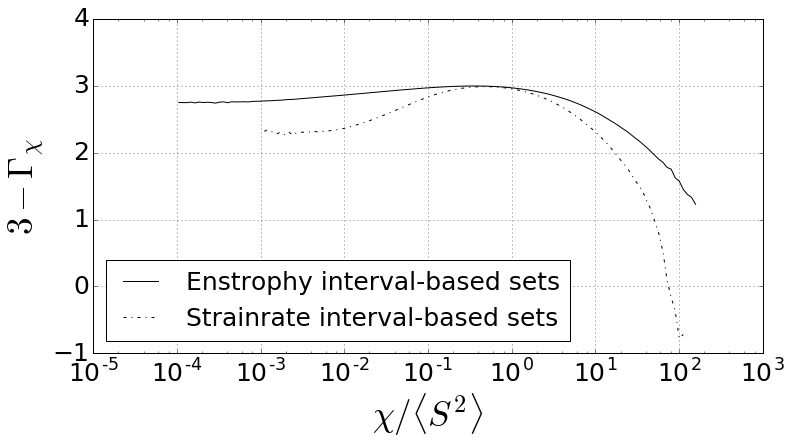

In [164]:
idx = (fiits != 0.)&(tl>10**(-4))&(tl<10**(2.2))
sidx = (sfiits != 0.)&(tl>10**(-3))&(tl<10**(2.1))
#sfiits = np.array(sfiits)
ptl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
plt.xlim([10**(-5),10**(3)])
plt.ylim([-1,4])
plt.grid()

plt.xlabel(r'$\chi/\langle S^2\rangle$', fontsize=35)
plt.ylabel(r'$3-\Gamma_\chi$', fontsize=35)

plt.semilogx(ptl[idx],fiits[idx]+3,'k-',label='Enstrophy interval-based sets')
plt.semilogx(ptl[sidx],sfiits[sidx]+3,'k-.',label='Strainrate interval-based sets')
#plt.plot(tl,sfiits+3,'r-',label='Strainrate excursion sets')
#plt.plot(tl,sfiits+3,'r',label='Strainrate excursion sets')
plt.legend(loc='lower left',prop={'size':25})
plt.savefig('interval-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

[-0.00462609 -0.00146677 -0.04127628  1.06496868]
[-0.03111645  0.0101717   1.04804413]


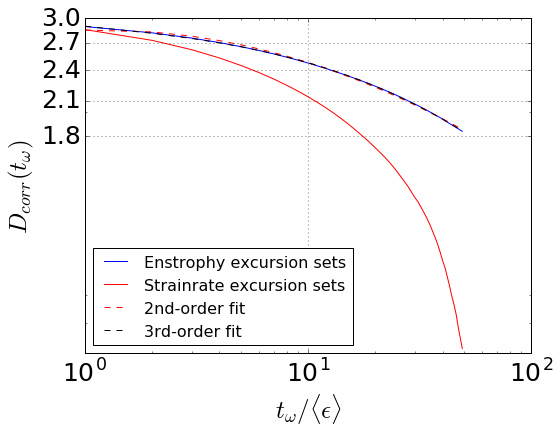

In [96]:
tl = np.arange(0,50,1)
fiits = np.array(fiits)

plt.figure(figsize=(8,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.ylim((0.7,3.0))
plt.xlabel(r'$t_\omega/\langle \epsilon\rangle$', fontsize=25)
plt.ylabel(r'$D_{corr}(t_\omega)$', fontsize=25)

ltl = np.log(tl[1:])
lfit = np.polyfit(ltl,np.log(fiits[1:]+3),3)
print(lfit)

ltl2 = np.log(tl[1:])
lfit2 = np.polyfit(ltl,np.log(fiits[1:]+3),2)
print(lfit2)

plt.loglog(tl,fiits+3,'b-',label='Enstrophy excursion sets')
plt.loglog(tl,sfiits+3,'r-',label='Strainrate excursion sets')
plt.loglog(np.exp(ltl),np.exp(lfit2[0]*(ltl**2)+lfit2[1]*ltl**1+lfit2[2]),'r--',label='2nd-order fit')
plt.loglog(np.exp(ltl),np.exp(lfit[0]*(ltl**3)+lfit[1]*ltl**2+lfit[2]*ltl+lfit[3]),'k--',label='3rd-order fit')
#plt.plot(tl,sfiits+3,'r',label='Strainrate excursion sets')
plt.legend(loc='lower left',prop={'size':16})
plt.yticks([1.8,2.1,2.4,2.7,3.0], ['1.8','2.1','2.4','2.7','3.0'])

plt.savefig('Dimension-excursion-log.pdf', format='pdf', bbox_inches='tight', transparent=True)

[-0.00462609 -0.00146677 -0.04127628  1.06496868]


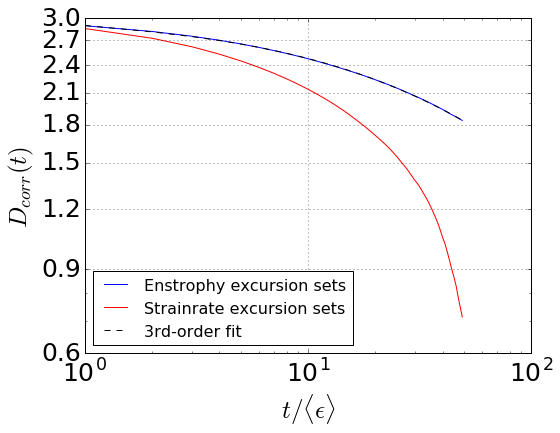

In [107]:
tl = np.arange(0,50,1)
fiits = np.array(fiits)

plt.figure(figsize=(8,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.ylim((0.7,3.0))
plt.xlabel(r'$t/\langle \epsilon\rangle$', fontsize=25)
plt.ylabel(r'$D_{corr}(t)$', fontsize=25)

ltl = np.log(tl[1:])
lfit = np.polyfit(ltl,np.log(fiits[1:]+3),3)
print(lfit)

plt.loglog(tl,fiits+3,'b-',label='Enstrophy excursion sets')
plt.loglog(tl,sfiits+3,'r-',label='Strainrate excursion sets')
plt.loglog(np.exp(ltl),np.exp(lfit[0]*(ltl**3)+lfit[1]*ltl**2+lfit[2]*ltl+lfit[3]),'k--',label='3rd-order fit')
#plt.plot(tl,sfiits+3,'r',label='Strainrate excursion sets')
plt.legend(loc='lower left',prop={'size':16})
plt.yticks([0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0], ['0.6','0.9','1.2','1.5','1.8','2.1','2.4','2.7','3.0'])

np.savez('enstrophy-powers.npz',fiits=fiits)
np.savez('strainrate-powers.npz',sfiits=sfiits)

plt.savefig('Dimension-excursion-log-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

[-0.00462609 -0.00146677 -0.04127628  1.06496868]
[-0.14165266  0.29404043  0.88028155]


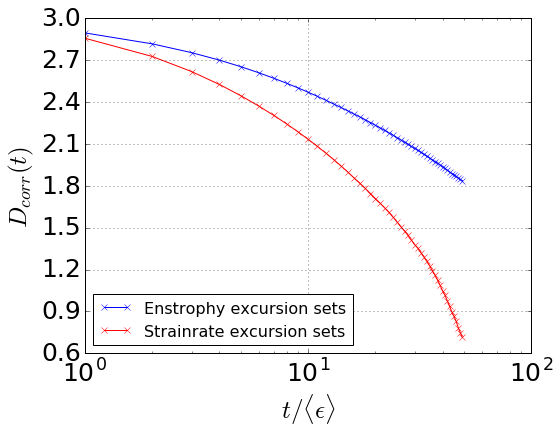

In [105]:
tl = np.arange(0,50,1)
fiits = np.array(fiits)

plt.figure(figsize=(8,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.ylim((0.7,3.0))
plt.xlabel(r'$t/\langle \epsilon\rangle$', fontsize=25)
plt.ylabel(r'$D_{corr}(t)$', fontsize=25)

ltl = np.log(tl[1:])
lfit = np.polyfit(ltl,np.log(fiits[1:]+3),3)
print(lfit)

sltl = np.log(tl[1:])
slfit = np.polyfit(sltl,np.log(sfiits[1:]+3),2)
print(slfit)

plt.semilogx(tl,fiits+3,'bx-',label='Enstrophy excursion sets')
plt.semilogx(tl,sfiits+3,'rx-',label='Strainrate excursion sets')
#plt.semilogx(np.exp(ltl),np.exp(lfit[0]*(ltl**3)+lfit[1]*ltl**2+lfit[2]*ltl+lfit[3]),'k--',label='3rd-order fit')
#plt.semilogx(np.exp(sltl),np.exp(slfit[0]*(sltl**2)+slfit[1]*sltl**1+slfit[2]),'k--',label='2nd-order fit')
#plt.plot(tl,sfiits+3,'r',label='Strainrate excursion sets')
plt.legend(loc='lower left',prop={'size':16})
plt.yticks([0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0], ['0.6','0.9','1.2','1.5','1.8','2.1','2.4','2.7','3.0'])

plt.savefig('Dimension-excursion-log-3.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [61]:
print(np.log(tl[1:]),np.log(fiits[1:]+3))
lfit = np.polyfit(np.log(tl[1:]),np.log(fiits[1:]+3),2)
print(lfit)

[ 0.          0.69314718  1.09861229  1.38629436  1.60943791  1.79175947
  1.94591015  2.07944154  2.19722458  2.30258509  2.39789527  2.48490665
  2.56494936  2.63905733  2.7080502   2.77258872  2.83321334  2.89037176
  2.94443898  2.99573227  3.04452244  3.09104245  3.13549422  3.17805383
  3.21887582  3.25809654  3.29583687  3.33220451  3.36729583  3.40119738
  3.4339872   3.4657359   3.49650756  3.52636052  3.55534806  3.58351894
  3.61091791  3.63758616  3.66356165  3.68887945  3.71357207  3.73766962
  3.76120012  3.78418963  3.80666249  3.8286414   3.8501476   3.87120101
  3.8918203 ] [ 1.06342332  1.03601832  1.01343177  0.99371229  0.97598459  0.95965891
  0.94455213  0.93041538  0.91715905  0.90460526  0.89253199  0.881056
  0.86997118  0.85953983  0.84951139  0.83977418  0.83058728  0.82145875
  0.81254723  0.80371734  0.79542285  0.78710471  0.77916952  0.77135093
  0.76348428  0.75572947  0.74789715  0.7408344   0.7335118   0.72663814
  0.71973067  0.71288531  0.7061741   0

In [23]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

dt = 0.05

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(w2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 367.5972716808319
time : 307.51140785217285
time : 317.56203293800354
time : 320.46256494522095
time : 311.52170729637146
time : 329.5488748550415


t = 1*sigma_2: Linear fit [alpha A] = [-0.03173073 -4.41830668]
t = 2*sigma_2: Linear fit [alpha A] = [-0.08603174 -4.50954818]
t = 3*sigma_2: Linear fit [alpha A] = [-0.13508293 -4.57037408]
t = 4*sigma_2: Linear fit [alpha A] = [-0.17985834 -4.60542478]
t = 5*sigma_2: Linear fit [alpha A] = [-0.21969904 -4.62975451]
t = 6*sigma_2: Linear fit [alpha A] = [-0.25699165 -4.64316203]


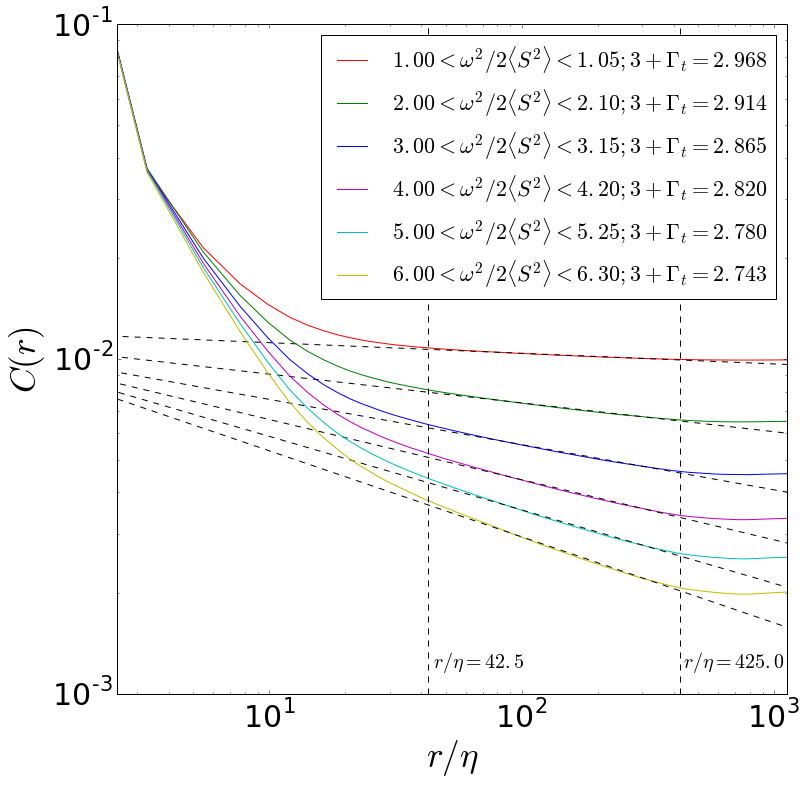

In [25]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**(-1)])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=1.*th,two=1.05*th,three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.0012, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.0012, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='upper right',prop={'size':22})
plt.savefig('twopoint-enstrophy-diff-0.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [26]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

dt = 0.05

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(w2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 342.3472104072571
time : 326.2853751182556
time : 331.27927136421204
time : 313.94005274772644
time : 310.64277744293213
time : 315.84701466560364


t = 7*sigma_2: Linear fit [alpha A] = [-0.29154124 -4.64765859]
t = 10*sigma_2: Linear fit [alpha A] = [-0.38332457 -4.63990691]
t = 15*sigma_2: Linear fit [alpha A] = [-0.50832969 -4.59091589]
t = 20*sigma_2: Linear fit [alpha A] = [-0.61082553 -4.52735395]
t = 30*sigma_2: Linear fit [alpha A] = [-0.77121437 -4.42164014]
t = 50*sigma_2: Linear fit [alpha A] = [-1.01191429 -4.20038511]


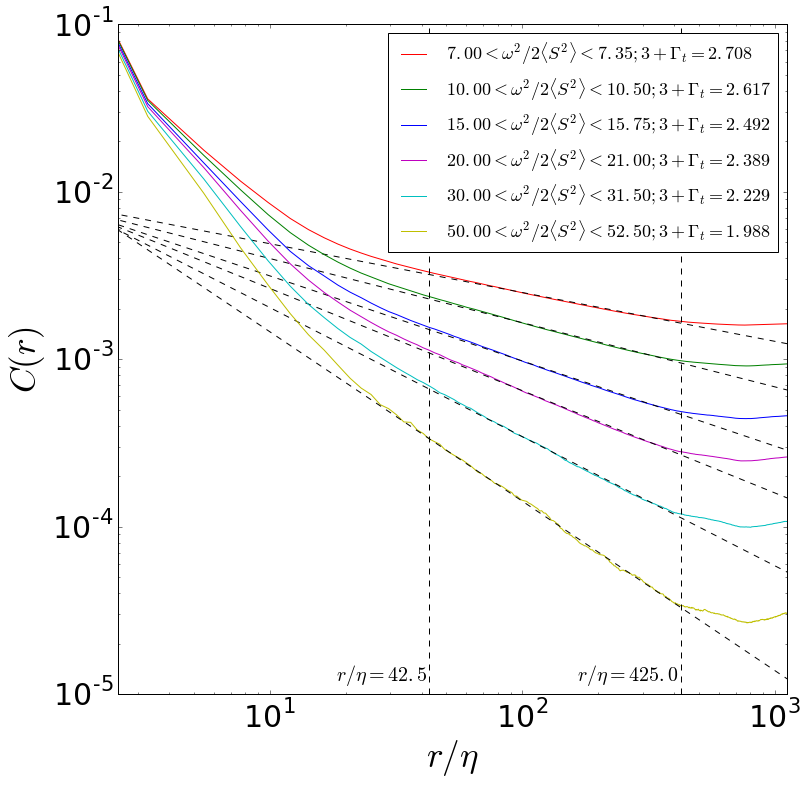

In [27]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-5),10**(-1)])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=1.*th,two=1.05*th,three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(18.2, 0.000012, r'$r/\eta = 42.5$', fontsize=20)
plt.text(165., 0.000012, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='upper right',prop={'size':18})
plt.savefig('twopoint-enstrophy-diff-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [28]:
start = time.time()

tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

dt = 0.05

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(S2 > t*avg)&(S2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 356.3770396709442
time : 319.52819871902466
time : 336.71355867385864
time : 331.78183341026306
time : 325.1833279132843
time : 320.1691687107086


t = 1*sigma_2: Linear fit [alpha A] = [-0.04574072 -4.00181833]
t = 2*sigma_2: Linear fit [alpha A] = [-0.13921391 -3.94411942]
t = 3*sigma_2: Linear fit [alpha A] = [-0.22927065 -3.86121028]
t = 4*sigma_2: Linear fit [alpha A] = [-0.31070722 -3.77231258]
t = 5*sigma_2: Linear fit [alpha A] = [-0.3854039  -3.67754192]
t = 6*sigma_2: Linear fit [alpha A] = [-0.45355783 -3.58477948]


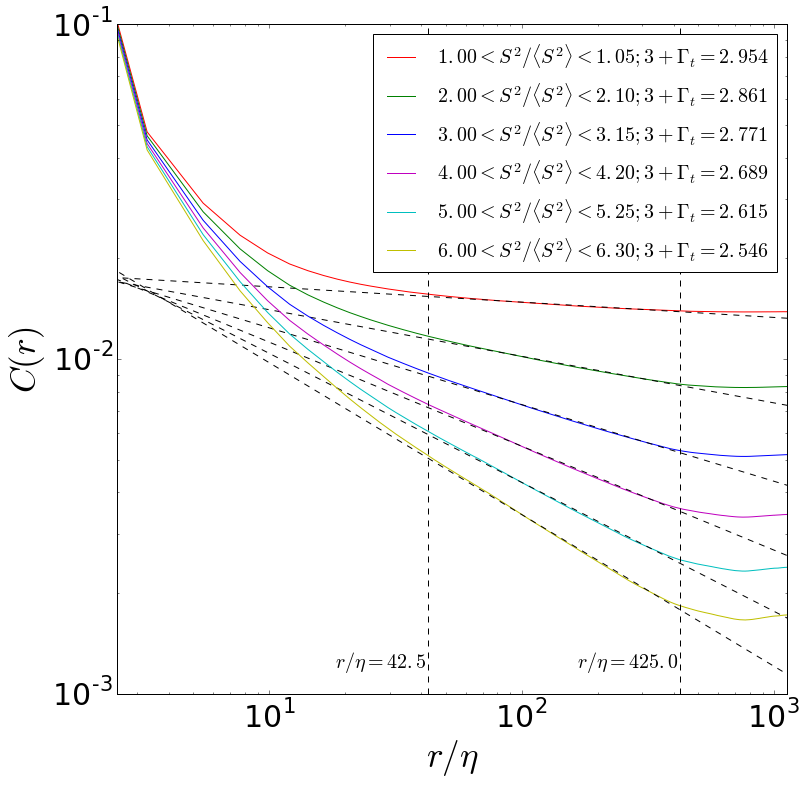

In [29]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**(-1)])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < S^2/\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=1.*th,two=1.05*th,three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(18.2, 0.0012, r'$r/\eta = 42.5$', fontsize=20)
plt.text(165., 0.0012, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='upper right',prop={'size':20})
plt.savefig('twopoint-strainrate-diff-0.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [30]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

dt = 0.05

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[(S2 > t*avg)&(S2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 332.1357452869415
time : 304.0529274940491
time : 282.20268726348877
time : 265.58885312080383
time : 269.453946352005
time : 282.0224390029907


t = 7*sigma_2: Linear fit [alpha A] = [-0.51424617 -3.50867318]
t = 10*sigma_2: Linear fit [alpha A] = [-0.6790023 -3.2548135]
t = 15*sigma_2: Linear fit [alpha A] = [-0.89665149 -2.9163442 ]
t = 20*sigma_2: Linear fit [alpha A] = [-1.09397256 -2.54080616]
t = 30*sigma_2: Linear fit [alpha A] = [-1.41128075 -1.95992455]
t = 50*sigma_2: Linear fit [alpha A] = [-1.87907992 -1.2406276 ]


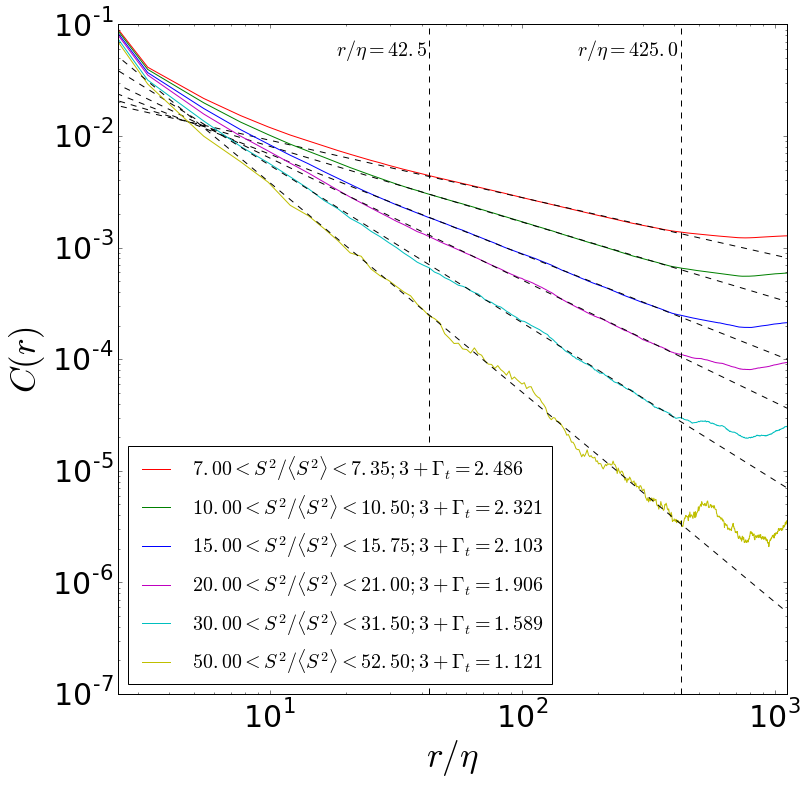

In [31]:
eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(-1)])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < S^2/\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=1.*th,two=1.05*th,three=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(18.2, 0.052, r'$r/\eta = 42.5$', fontsize=20)
plt.text(165., 0.052, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':20})
plt.savefig('twopoint-strainrate-diff-1.pdf', format='pdf', bbox_inches='tight', transparent=True)